In [1]:
import scipy
import matplotlib.pyplot as plt
import wave
import pyaudio
import numpy as np
#To see installation path
#print(scipy.__file__)
#print(matplotlib.__file__)
#print(wave.__file__)
#print(pyaudio.__file__)


In [2]:
#How many frames are going to be  recorded per second 
FRAMES_PER_BUFFER=3200
#mono recording : Single channel recording
#Stero recording: double channel recording
FORMAT=pyaudio.paInt16
#If channel=2  when stero recording and then FORMAT=pa.paInt32
CHANNELS=1
RATE=16000

In [67]:

# Create an interface to PortAudio
pa = pyaudio.PyAudio() 

'''
PortAudio is an open-source computer library for audio playback and recording.
It is a cross-platform library, so programs using it can run on many different computer operating systems,
including Windows,Mac OS X and Linux.
'''
#This stream access the microphone 
stream=pa.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    #as access microphone
    input=True,
    frames_per_buffer=FRAMES_PER_BUFFER
)


In [68]:
print('Start recording')
seconds=8 #How long the recording is done
frames=[]  #empty list for capturing individually capturing the audio frequency 

#increment evry single time with recording of new frame
second_tracking=0
#counting second
second_count=0

#RATE/FRAMES_PER_BUFFER is how many times it is recording ber second
#it is recording buffer by buffer so in one second RATE amount data is recorded 
#so RATE/FRAMES_PER_BUFFER will be how many buffer it is recording in one second 
for i in range(0,int(RATE/FRAMES_PER_BUFFER*seconds)):
    data=stream.read(FRAMES_PER_BUFFER)
    frames.append(data)
    second_tracking+=1
    if second_tracking ==RATE/FRAMES_PER_BUFFER:
        second_count+=1; #one second done
        second_tracking=0
        print("Time left :",seconds-second_count)

#recording shutdown
stream.stop_stream()
stream.close()
pa.terminate()


Start recording
Time left : 7
Time left : 6
Time left : 5
Time left : 4
Time left : 3
Time left : 2
Time left : 1
Time left : 0


In [69]:
#recorded file saved
obj=wave.open('test.wav','wb') # wb stands for write binary 
obj.setnchannels(CHANNELS) #seting the number of channels
obj.setsampwidth(pa.get_sample_size(FORMAT))
obj.setframerate(RATE)
obj.writeframes(b''.join(frames))
obj.close()

In [70]:
#recorded file will be read now and processed
obj1=wave.open('test.wav','rb') # rb->read binary
sample_freq=obj1.getframerate() # get sample frequency
frames=obj1.getnframes() #read no of frames
signal_wave=obj1.readframes(-1) # -1 means read every thing
obj1.close()

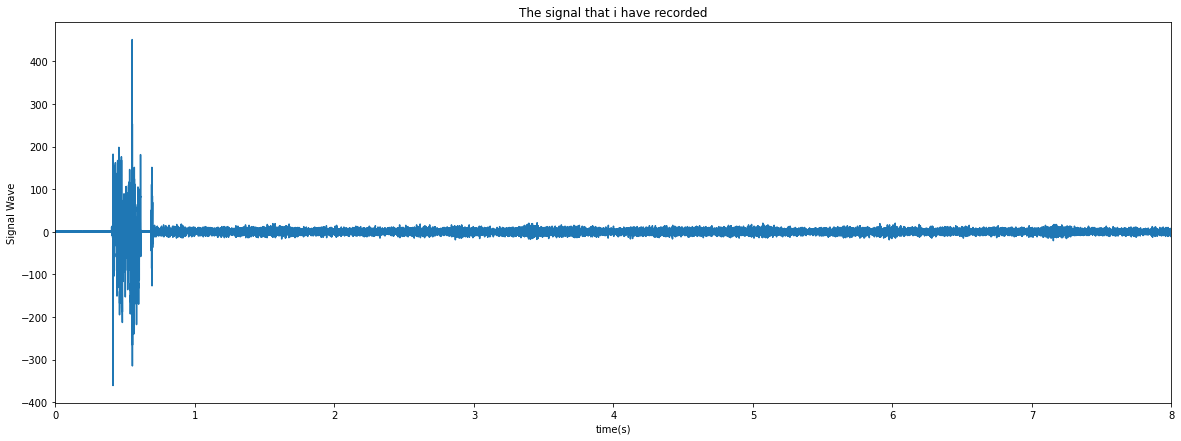

In [71]:
#plotting the signal
time=frames/sample_freq
#if one channel use int16 else use int32 
audio_array=np.frombuffer(signal_wave,dtype=np.int16)
#linspace(start_time,end_time,total_no_of_datapoint)
times=np.linspace(0,time,num=frames)
plt.figure(figsize=(20,7))
plt.plot(times,audio_array)
plt.ylabel('Signal Wave')
plt.xlabel('time(s)')
plt.title('The signal that i have recorded')
plt.xlim(0,time)
plt.show()

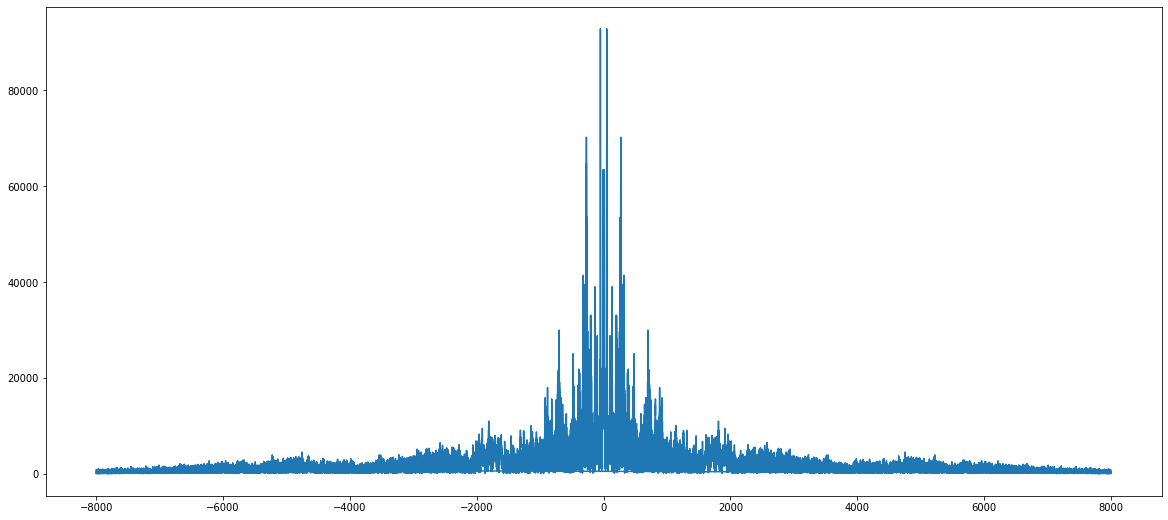

In [72]:
from scipy.fft import fft, fftfreq
# Number of samples
N = frames
yf = fft(audio_array)
xf = fftfreq(N, 1 / sample_freq)
plt.figure(figsize=(20,9))
plt.plot(xf, np.abs(yf))
plt.show()